<a href="https://colab.research.google.com/github/jakubstrawa1/Plant-Disease-Prediction/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!ls "/content/drive/My Drive"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer 
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical


FileNotFoundError: ignored

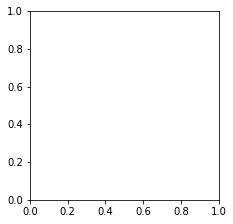

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [ ]:
# converting all the images to array using img_to_array

def convert_img_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [ ]:
dir = "/content/drive/My Drive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Potato___Early_blight', 'Tomage-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1


In [ ]:
# receiving and converting image to a numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_img_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
# visualize number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    300
1    300
0    300
dtype: int64

In [ ]:
image_list[0].shape

(256, 256, 3)

In [ ]:
# checking the total amount of images

label_list = np.array(label_list)
label_list.shape

(900,)

In [ ]:
#test train split

x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
#normalizing dataset 
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256,256,3)
x_test = x_test.reshape(-1, 256,256,3)

In [ ]:
#using to_categorical function built into keras
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#NOW WE'RE BUILDING A MODEL
#im using different types of layers such as MaxPooling, Conv2D, Flatten, Dense with 3 layers activated by softmax
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 112896)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                7225408   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [ ]:
#compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

In [ ]:
#splitting the trainingg dataset into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
# training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data= (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 35s 7s/step - loss: 0.9464 - accuracy: 0.4913 - val_loss: 0.5769 - val_accuracy: 0.9306
Epoch 2/50
5/5 [==============================] - 31s 6s/step - loss: 0.4787 - accuracy: 0.9184 - val_loss: 0.3533 - val_accuracy: 0.9444
Epoch 3/50
5/5 [==============================] - 30s 6s/step - loss: 0.3006 - accuracy: 0.9410 - val_loss: 0.2186 - val_accuracy: 0.9583
Epoch 4/50
5/5 [==============================] - 30s 6s/step - loss: 0.1938 - accuracy: 0.9583 - val_loss: 0.1637 - val_accuracy: 0.9653
Epoch 5/50
5/5 [==============================] - 31s 6s/step - loss: 0.1369 - accuracy: 0.9688 - val_loss: 0.1145 - val_accuracy: 0.9792
Epoch 6/50
5/5 [==============================] - 31s 6s/step - loss: 0.0962 - accuracy: 0.9792 - val_loss: 0.0909 - val_accuracy: 0.9792
Epoch 7/50
5/5 [==============================] - 31s 6s/step - loss: 0.0722 - accuracy: 0.9826 - val_loss: 0.0824 - val_accuracy: 0.9792
Epoch 8/50
5/5 [==================

In [ ]:
model.save("/content/drive/My Drive/plant_disease.h5")
json_model = model.to_json()

with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
  json_file.write(json_model)
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

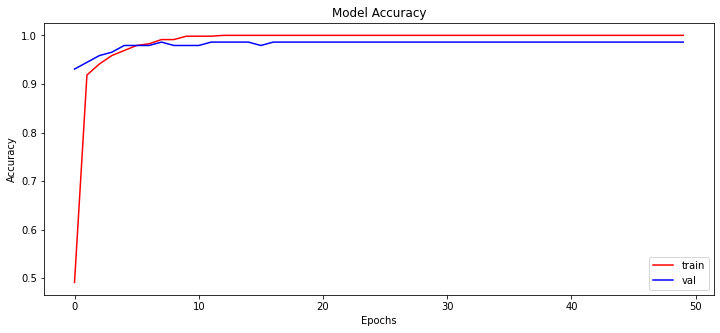

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
print("INFO Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

INFO Calculating model accuracy
6/6 [==============================] - 3s 428ms/step - loss: 0.0628 - accuracy: 0.9833
Test Accuracy: 98.33333492279053


In [ ]:
y_pred = model.predict(x_test)

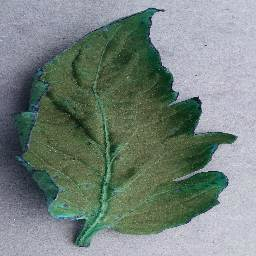

In [ ]:
img = array_to_img(x_test[10])
img

In [ ]:
print("Originally: ",all_labels[np.argmax(y_test[10])])
print("Predicted: ",all_labels[np.argmax(y_pred[10])])

Originally:  Potato-Potato___Early_blight
Predicted:  Potato-Potato___Early_blight
